In [34]:
import os
import cv2
import copy
import random
import numpy as np

from marco import *
from network import *
from matplotlib import pyplot as plt

LAST UPDATED ON 2023/04/21

1. Aims at fast testing on the model
2. The current model reach 98.4% training accuracy and 94.7% validation accuracy. The result can be checked in best_model/hist_callback.csv

In [15]:
IND2CLS = {0: 'cat', 1: 'dog'}

ROOT = 'dog_cat_cls_data/raw'
data_path = os.listdir(ROOT)
img_path = sorted([os.path.join(ROOT, f) for f in data_path if f.split('.')[-1] == 'jpg'])

In [16]:
net = Network(cls_num = 2, is_train = False)
net_model = net.obj_cls()
net_model.load_weights('best_model/best_weights.h5')

1/1 [==============================] - 0s 11ms/step


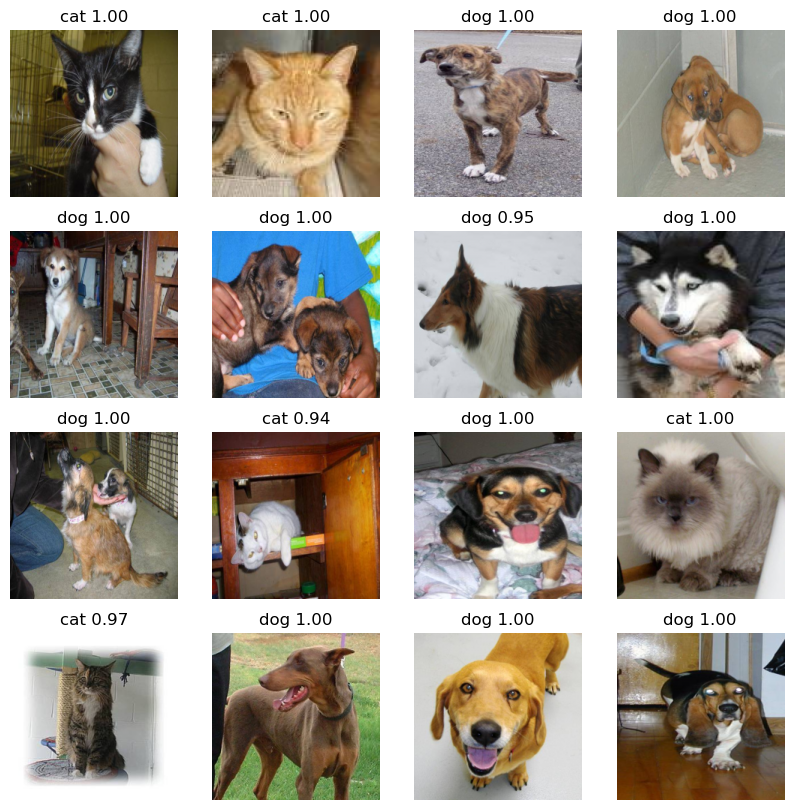

In [33]:
N_ROW = N_COL = 4

fig, ax = plt.subplots(nrows = N_ROW, 
                       ncols = N_COL, 
                       figsize = (10, 10))

rand_path = random.sample(img_path, 16)

img_ind   = 0

r = c = 0
for img_load in rand_path:
    
    img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    img = img/255.

    img_h, img_w, _ = img.shape
    
    p   = net_model.predict(np.expand_dims(img, 0))
    cls = IND2CLS[np.argmax(p[0])] + f' {max(p[0])  :.2f}'
    
    draw_img = copy.deepcopy(img)
    ax[r, c].imshow(draw_img)
    ax[r, c].title.set_text(cls)
    ax[r, c].axis('off')
    
    c += 1
    if c >= 4:
        c  = 0
        r += 1